In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()

In [4]:
x_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [5]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
x_train[0].shape , y_train[0].shape

((28, 28), ())

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
len(class_names)

10

9


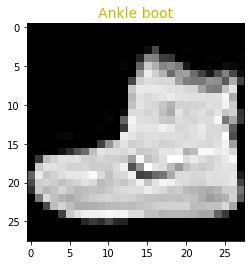

In [26]:
plt.imshow(x_train[0] , cmap='gray')
plt.title(class_names[y_train[0]] , c='y' , size=14)
print(y_train[0])

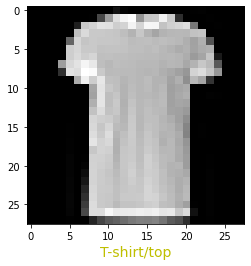

In [28]:
plt.imshow(x_train[17] , cmap='gray')
plt.xlabel(class_names[y_train[17]] , c='y' , size=14);

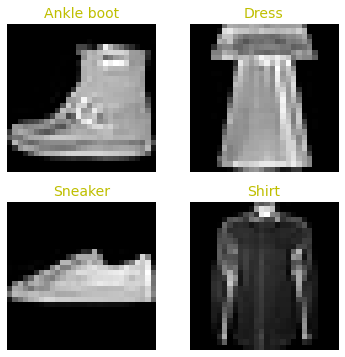

In [29]:
import random
plt.figure(figsize=(6,6))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index], cmap='gray')
  plt.title(class_names[y_train[rand_index]] , c='y' , size=14) 
  plt.axis(False)

In [30]:
class_names[y_train[0]]

'Ankle boot'

In [51]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [52]:
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [53]:
model_1.fit(x_train,y_train,epochs=10,verbose=0)

In [63]:
non_norm_history = model_1.fit(x_train,y_train,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1451 - accuracy: 0.2479 - val_loss: 1.5052 - val_accuracy: 0.3659
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4677 - accuracy: 0.3857 - val_loss: 1.4412 - val_accuracy: 0.4049
Epoch 3/10
1875/1875 [==============================] - 2s 980us/step - loss: 1.3842 - accuracy: 0.4220 - val_loss: 1.3467 - val_accuracy: 0.4372
Epoch 4/10
1875/1875 [==============================] - 2s 965us/step - loss: 1.3091 - accuracy: 0.4407 - val_loss: 1.2946 - val_accuracy: 0.4561
Epoch 5/10
1875/1875 [==============================] - 2s 982us/step - loss: 1.2720 - accuracy: 0.4566 - val_loss: 1.2731 - val_accuracy: 0.4535
Epoch 6/10
1875/1875 [==============================] - 2s 950us/step - loss: 1.2515 - accuracy: 0.4640 - val_loss: 1.2544 - val_accuracy: 0.4695
Epoch 7/10
1875/1875 [==============================] - 2s 958us/step - loss: 1.2385 - accuracy: 0.4718 - val_loss: 1.2444 - val

In [55]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5903 - accuracy: 0.3209


[1.5903432369232178, 0.32089999318122864]

In [56]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [31]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.min() , x_train.max()

(0.0, 1.0)

In [76]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [77]:
model_2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ['accuracy'])

In [78]:
norm_history = model_2.fit(x_train,y_train,
            epochs=10,
            validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 943us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_a

In [79]:
model_2.evaluate(x_test,y_test)

313/313 [==============================] - 0s 791us/step - loss: 0.5658 - accuracy: 0.8014


[0.5658251047134399, 0.8014000058174133]

In [80]:
non_norm_history.history

{'loss': [2.145080089569092,
  1.4676789045333862,
  1.3842167854309082,
  1.309102177619934,
  1.271990180015564,
  1.251522183418274,
  1.238481044769287,
  1.2303866147994995,
  1.223773717880249,
  1.2193775177001953],
 'accuracy': [0.24793332815170288,
  0.38571667671203613,
  0.4219833314418793,
  0.44066667556762695,
  0.4566333293914795,
  0.46399998664855957,
  0.4717666804790497,
  0.47626665234565735,
  0.48036667704582214,
  0.48213332891464233],
 'val_loss': [1.5052411556243896,
  1.4412131309509277,
  1.3466706275939941,
  1.294587254524231,
  1.2731295824050903,
  1.2544177770614624,
  1.2443796396255493,
  1.237146258354187,
  1.2337125539779663,
  1.2373290061950684],
 'val_accuracy': [0.3659000098705292,
  0.4049000144004822,
  0.43720000982284546,
  0.4560999870300293,
  0.45350000262260437,
  0.46950000524520874,
  0.4731999933719635,
  0.47589999437332153,
  0.48080000281333923,
  0.4812999963760376]}

In [81]:
norm_history.history

{'loss': [1.0347838401794434,
  0.6375991702079773,
  0.5942122340202332,
  0.574958324432373,
  0.5641122460365295,
  0.5544357895851135,
  0.5487954616546631,
  0.5428295731544495,
  0.5372939705848694,
  0.5359908938407898],
 'accuracy': [0.647433340549469,
  0.7756666541099548,
  0.7913833260536194,
  0.7979166507720947,
  0.800599992275238,
  0.8042666912078857,
  0.8062833547592163,
  0.8077333569526672,
  0.8096500039100647,
  0.812416672706604],
 'val_loss': [0.6937335133552551,
  0.6400147676467896,
  0.6247132420539856,
  0.607759952545166,
  0.6168836951255798,
  0.5855279564857483,
  0.6096576452255249,
  0.5786882638931274,
  0.569830596446991,
  0.5658251047134399],
 'val_accuracy': [0.7616999745368958,
  0.7820000052452087,
  0.7782999873161316,
  0.788100004196167,
  0.788100004196167,
  0.7950999736785889,
  0.7835999727249146,
  0.7971000075340271,
  0.7976999878883362,
  0.8014000058174133]}

<AxesSubplot:title={'center':'non_norm'}>

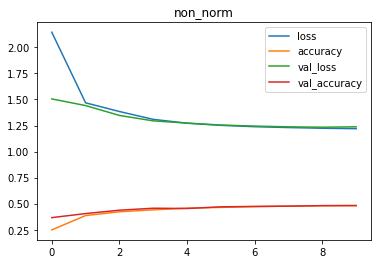

In [82]:
pd.DataFrame(non_norm_history.history).plot(title="non_norm")

<AxesSubplot:title={'center':'affsgfs'}>

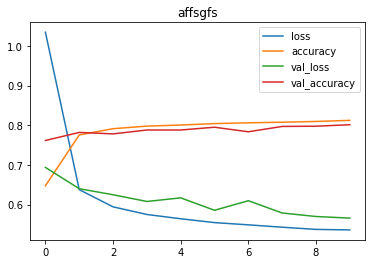

In [83]:
pd.DataFrame(norm_history.history).plot(title="affsgfs")

In [32]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(90,activation='relu'),
    tf.keras.layers.Dense(90,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [33]:
model_3.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ['accuracy'])

In [34]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [35]:
model_3_history = model_3.fit(x_train,y_train,
                              epochs=15,
                              callbacks=[lr_scheduler])

Epoch 1/15
1875/1875 [==============================] - 5s 1ms/step - loss: 0.4933 - accuracy: 0.8252 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3708 - accuracy: 0.8651 - lr: 0.0011
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3407 - accuracy: 0.8752 - lr: 0.0013
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3231 - accuracy: 0.8809 - lr: 0.0014
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3115 - accuracy: 0.8840 - lr: 0.0016
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3005 - accuracy: 0.8873 - lr: 0.0018
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2971 - accuracy: 0.8906 - lr: 0.0020
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2967 - accuracy: 0.8898 - lr: 0.0022
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.29

In [36]:
test_loss , test_acc = model_3.evaluate(x_test,y_test)
print(test_loss,test_acc)

313/313 [==============================] - 1s 908us/step - loss: 0.4011 - accuracy: 0.8591
0.40107011795043945 0.8590999841690063


(array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

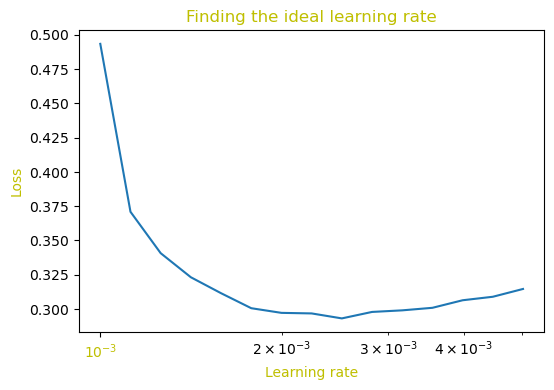

In [48]:
# 15 is the number of epochs
plt.figure(dpi=100)
lrs = 1e-3 * (10**(np.arange(15)/20))
plt.semilogx(lrs, model_3_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate" , c='y')
plt.ylabel("Loss", c='y')
plt.title("Finding the ideal learning rate", c='y')
plt.xticks(c='y')

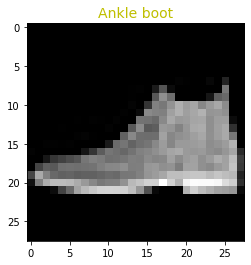

In [50]:
plt.imshow(x_test[0] , cmap='gray')
plt.title(class_names[y_test[0]] , c='y' ,size=14)
plt.show()

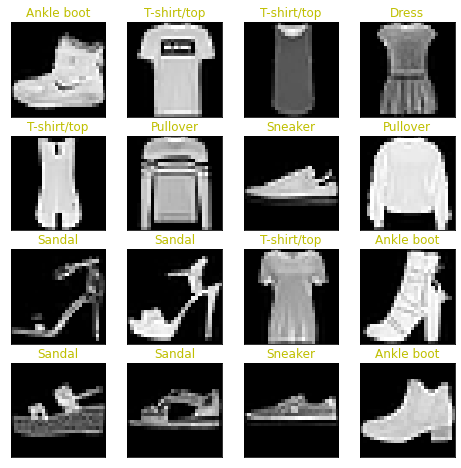

In [53]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
    plt.title(class_names[y_train[i]] , c='y' , size=12)
plt.show()

In [54]:
y_pred = model_3.predict(x_test)

313/313 [==============================] - 0s 811us/step


In [56]:
y_pred[0] # show output classes as a probability of all classes as numbers

array([1.69004174e-29, 1.03982703e-22, 2.85256569e-19, 1.84435477e-28,
       3.06222713e-25, 7.67484437e-07, 9.28202973e-22, 3.76176694e-03,
       1.21411475e-14, 9.96237397e-01], dtype=float32)

In [57]:
np.argmax(y_pred[0]) # take the large number of predicted probability of all classes 

9

In [58]:
class_names[y_train[0]]

'Ankle boot'

In [60]:
class_names[y_test[0]]

'Ankle boot'

In [61]:
print(y_test[0] , class_names[y_test[0]])

9 Ankle boot


In [62]:
kk = np.argmax(y_pred[0])
print(kk , class_names[kk])

9 Ankle boot


In [65]:
i = 0
print("y_test value is " , "index" , y_test[i] , class_names[y_test[i]])
kk = np.argmax(y_pred[i])
print("y_pred value is " , "index" , kk , class_names[kk])

y_test value is  index 9 Ankle boot
y_pred value is  index 9 Ankle boot


In [66]:
i = 4025
print("y_test value is " , "index" , y_test[i] , class_names[y_test[i]])
kk = np.argmax(y_pred[i])
print("y_pred value is " , "index" , kk , class_names[kk])

y_test value is  index 4 Coat
y_pred value is  index 2 Pullover


In [67]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [68]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

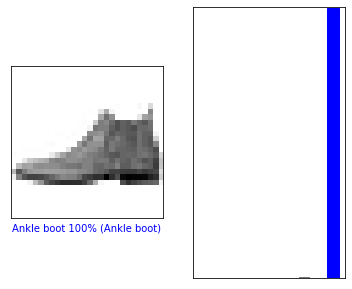

Ankle boot


In [74]:
i = 0
plt.figure(figsize=(6,5))
plt.subplot(1,2,1)
plot_image(i, y_pred, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred,  y_test)
plt.show();
print(class_names[y_test[0]])

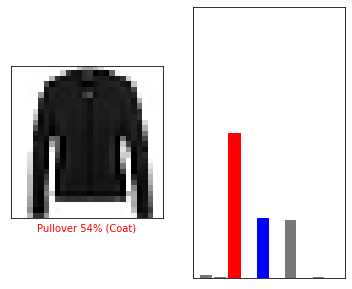

Coat


In [75]:
i = 4025
plt.figure(figsize=(6,5))
plt.subplot(1,2,1)
plot_image(i, y_pred, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred,  y_test)
plt.show()
print(class_names[y_test[4025]])

In [76]:
y_probs = model_3.predict(x_test)
y_probs[0]

313/313 [==============================] - 0s 815us/step


array([1.69004174e-29, 1.03982703e-22, 2.85256569e-19, 1.84435477e-28,
       3.06222713e-25, 7.67484437e-07, 9.28202973e-22, 3.76176694e-03,
       1.21411475e-14, 9.96237397e-01], dtype=float32)

In [79]:
y_probs[0].argmax() , class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [80]:
y_pred = y_probs.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [81]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [124]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [84]:
con = confusion_matrix(y_test,y_pred)
con

array([[743,   1,   7,  59,   1,   1, 179,   0,   9,   0],
       [  2, 963,   0,  26,   2,   0,   5,   0,   2,   0],
       [ 11,   2, 812,  23,  40,   0, 112,   0,   0,   0],
       [ 15,   5,   6, 938,   0,   1,  28,   0,   7,   0],
       [  0,   1, 208,  94, 639,   0,  54,   0,   4,   0],
       [  0,   0,   0,   1,   0, 935,   0,  25,   2,  37],
       [ 88,   0,  85,  51,  82,   0, 685,   0,   9,   0],
       [  0,   0,   0,   0,   0,  14,   0, 940,   0,  46],
       [  3,   0,   4,   8,   1,   1,   8,   5, 970,   0],
       [  1,   0,   0,   0,   0,   4,   0,  29,   0, 966]], dtype=int64)

In [130]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels),
         
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

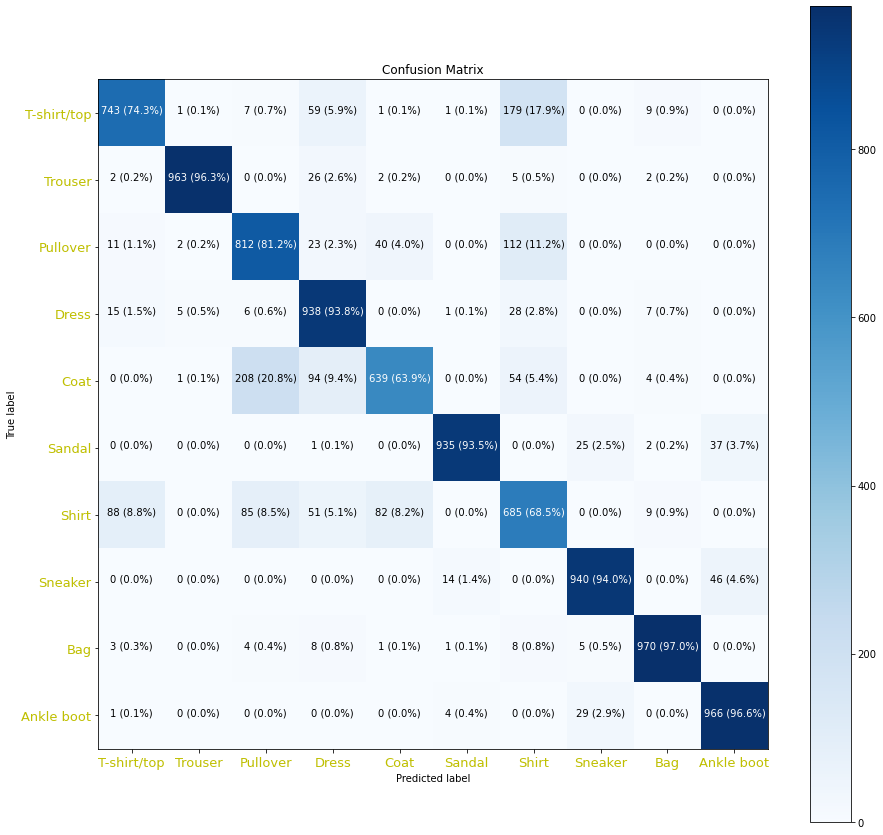

In [133]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)
plt.xticks(c='y' , size='13')
plt.yticks(c='y' , size='13');

In [134]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap='gray')

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 17ms/step


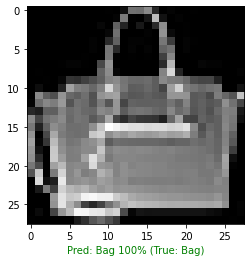

In [135]:
plot_random_image(model=model_3, 
                  images=x_test, 
                  true_labels=y_test, 
                  classes=class_names)